In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
path_to_geralt = os.path.join("../Models3D/Geralt","Geralt.obj")
path_to_model = path_to_geralt

## Using Trimesh

In [13]:
import trimesh

In [4]:
def get_model_mesh(path_to_model: str):
    mesh_model = trimesh.load(path_to_model)

    if isinstance(mesh_model, trimesh.Scene):
        mesh_model = mesh_model.dump(concatenate=True)

    return mesh_model

In [10]:
def get_mesh_info(mesh: trimesh.Trimesh):
    print(f'Euler characteristic of the spatial graph of the mesh: Xi = V - E + F = {mesh.euler_number}')
    print(f'Mesh is watertight: {mesh.is_watertight}')
    print(f'Mesh volume: {mesh.volume}')
    print(f'Mesh convex hull volume: {mesh.convex_hull.volume}')

In [11]:
mesh = get_model_mesh(path_to_model)
get_mesh_info(mesh)

Euler characteristic of the spatial graph of the mesh: Xi = V - E + F = 2551
Mesh is watertight: False
Mesh volume: 0.23195511531950255
Mesh convex hull volume: 0.8313737299397399


In [12]:
mesh.show()

## Using Open3D

In [3]:
import open3d as o3d

### Visualize a 3D mesh

In [47]:
def mesh_visualize(mesh, **kwargs):
    if 'view_window' in kwargs:
        view_window = kwargs['view_window']
    else:
        view_window = False
        
    if 'visualize_type' in kwargs:
        visualize_type = kwargs['visualize_type']
    else:
        visualize_type = 'surface_normals'
        
    if 'title' in kwargs:
        title = kwargs['title']
    else:
        title = 'Mesh'
            
    vis = o3d.visualization.Visualizer() 
    vis.create_window(visible=view_window) 
    vis.add_geometry(mesh) 
    vis.poll_events() 
    vis.update_renderer() 

    if visualize_type == 'uniform_color':
        data = vis.capture_screen_float_buffer(True)
    elif visualize_type == 'depth':
        data = vis.capture_depth_float_buffer(True)
    elif visualize_type == 'surface_normals':
        mesh.compute_vertex_normals()
        data = vis.capture_screen_float_buffer(True)
    elif visualize_type == 'paint':
        mesh.compute_vertex_normals()
        if 'color' in kwargs:
            mesh.paint_uniform_color(kwargs['color'])
        else:
            mesh.paint_uniform_color([1, 0.706, 0])
        data = vis.capture_screen_float_buffer(True)
    
    data = np.asarray(data)
    plt.figure(figsize=(15, 15))
    plt.imshow(data)
    plt.title(title)
    plt.axis('off')
    plt.show() 

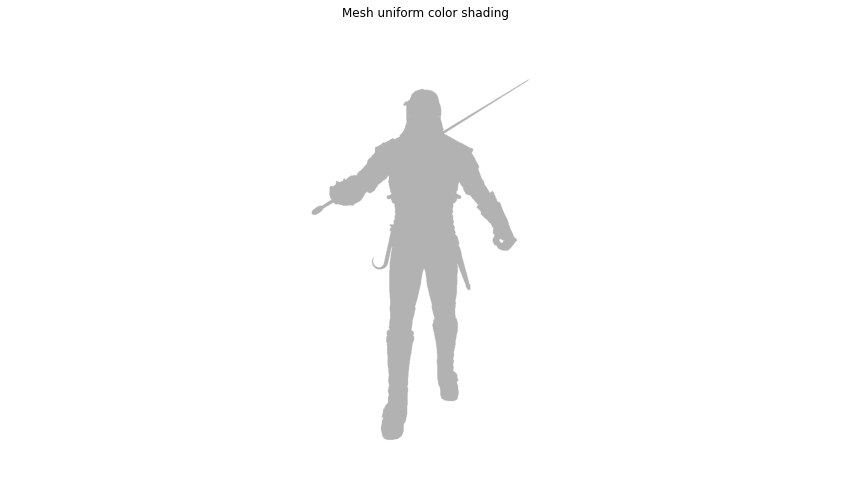

In [48]:
mesh = o3d.io.read_triangle_mesh(path_to_model) 
options = {'visualize_type': 'uniform_color', 
           'view_window': False, 
           'title': 'Mesh uniform color shading'}
mesh_visualize(mesh, **options)

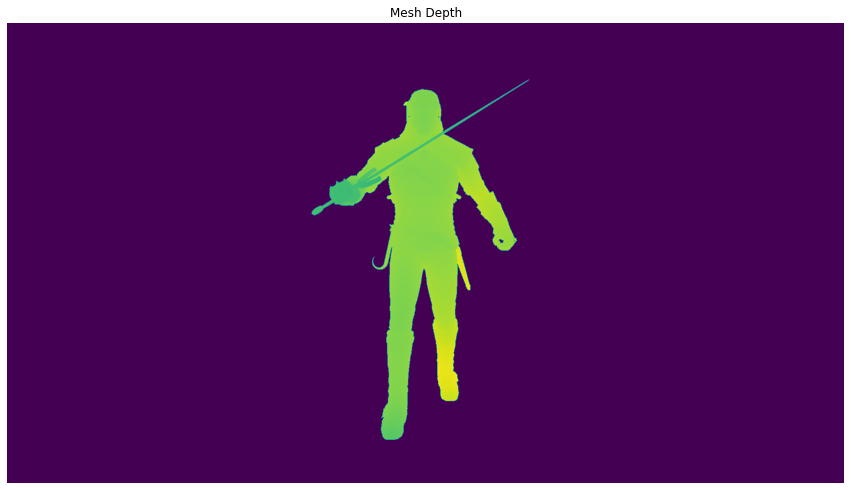

In [49]:
mesh = o3d.io.read_triangle_mesh(path_to_model) 
options = {'visualize_type': 'depth', 
           'view_window': False, 
           'title': 'Mesh Depth'}
mesh_visualize(mesh, **options)

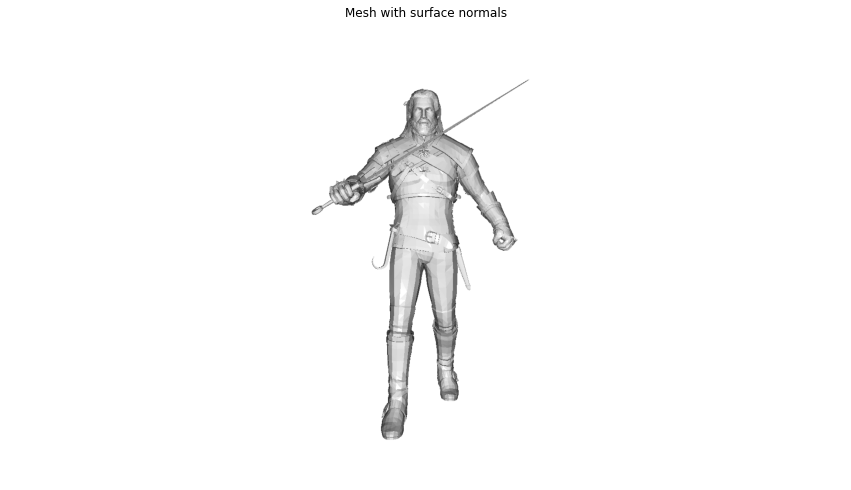

In [50]:
mesh = o3d.io.read_triangle_mesh(path_to_model) 
options = {'visualize_type': 'surface_normals', 
           'view_window': False, 
           'title': 'Mesh with surface normals'}
mesh_visualize(mesh, **options)

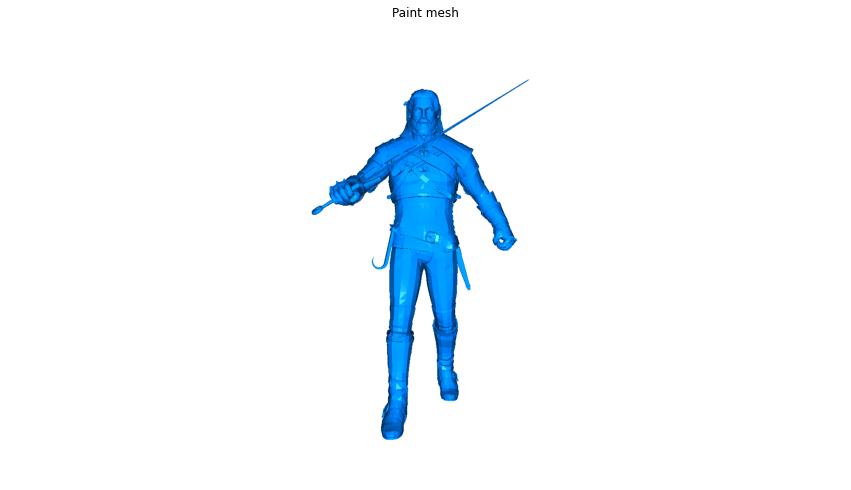

In [56]:
mesh = o3d.io.read_triangle_mesh(path_to_model) 
options = {'visualize_type': 'paint', 
           'view_window': False, 
           'title': 'Paint mesh',
           'color': [0.0, 0.5, 1.0]}
mesh_visualize(mesh, **options)

### Mesh filtering

In [79]:
def mesh_filtering_visualize(mesh, **kwargs):
    if 'noise' in kwargs:
        noise = kwargs['noise']
    else:
        noise = .05
    
    if 'iters' in kwargs:
        iters = kwargs['iters']
    else:
        iters = 10
    iters_check = int(iters / 2)
    
    if 'filter_type' in kwargs:
        filter_type = kwargs['filter_type']
    else:
        filter_type = 'average'
    
    vertices = np.asarray(mesh.vertices)
    vertices += np.random.uniform(0, noise, size=vertices.shape)
    mesh.vertices = o3d.utility.Vector3dVector(vertices)
    
    options = {'visualize_type': 'paint', 
           'view_window': False, 
           'title': 'Mesh after applying noise',
           'color': [0.0, 0.5, 1.0]}
    mesh_visualize(mesh, **options)
    
    if filter_type == 'average':
        mesh_out = mesh.filter_smooth_simple(number_of_iterations=iters_check)
        options['title'] = f'Mesh after applying the averaging filter ({iters_check} iterations)'
        mesh_visualize(mesh_out, **options)

        mesh_out = mesh.filter_smooth_simple(number_of_iterations=iters)
        options['title'] = f'Mesh after applying the averaging filter ({iters} iterations)'
        mesh_visualize(mesh_out, **options)
    elif filter_type == 'laplacian':
        mesh_out = mesh.filter_smooth_laplacian(number_of_iterations=iters_check)
        options['title'] = f'Mesh after applying Laplacian filter ({iters_check} iterations)'
        mesh_visualize(mesh_out, **options)

        mesh_out = mesh.filter_smooth_laplacian(number_of_iterations=iters)
        options['title'] = f'Mesh after applying Laplacian filter ({iters} iterations)'
        mesh_visualize(mesh_out, **options)
    elif filter_type == 'taubin':
        mesh_out = mesh.filter_smooth_taubin(number_of_iterations=iters_check)
        options['title'] = f'Mesh after applying Taubin filter ({iters_check} iterations)'
        mesh_visualize(mesh_out, **options)

        mesh_out = mesh.filter_smooth_taubin(number_of_iterations=iters)
        options['title'] = f'Mesh after applying Taubin filter ({iters} iterations)'
        mesh_visualize(mesh_out, **options)

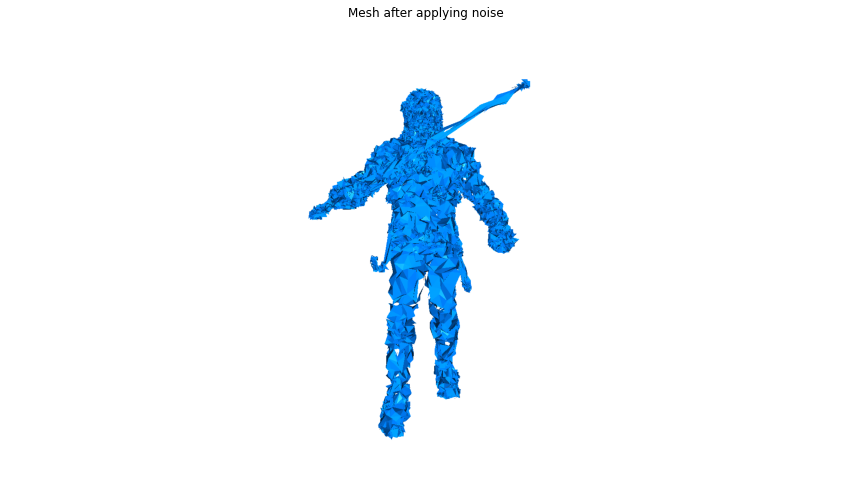

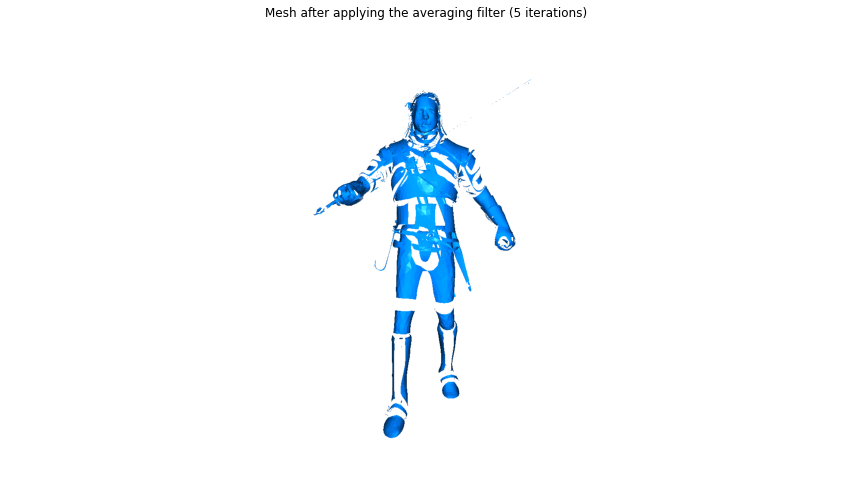

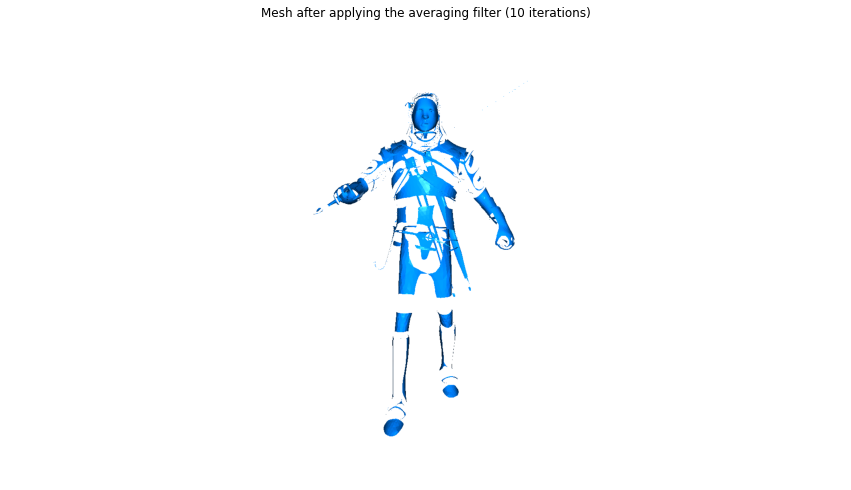

In [85]:
mesh = o3d.io.read_triangle_mesh(path_to_model) 
options = {'noise': 0.05, 'iters': 10, 'filter_type': 'average'}
mesh_filtering_visualize(mesh, **options)

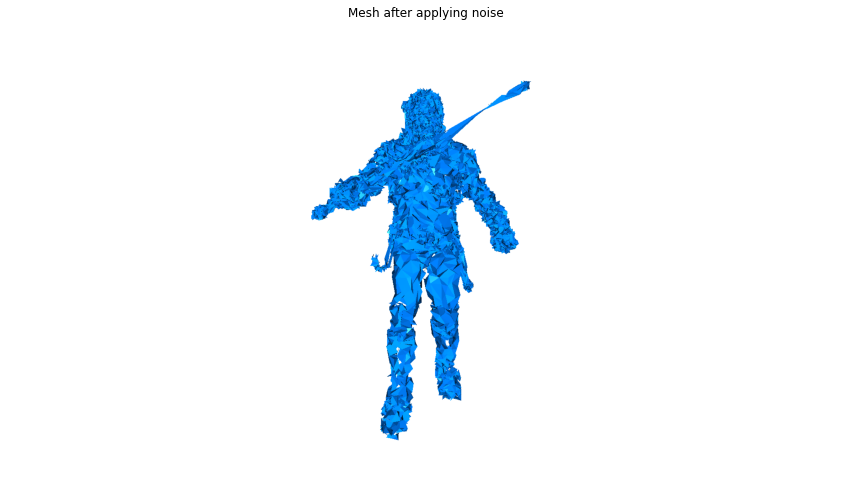

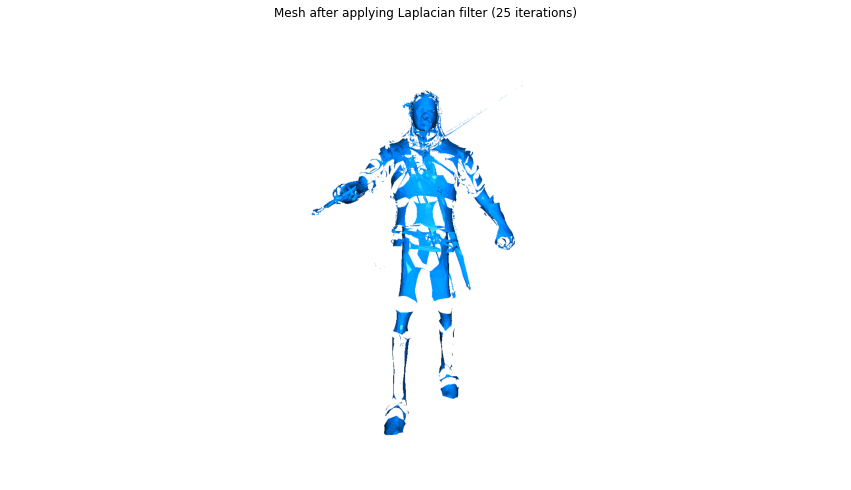

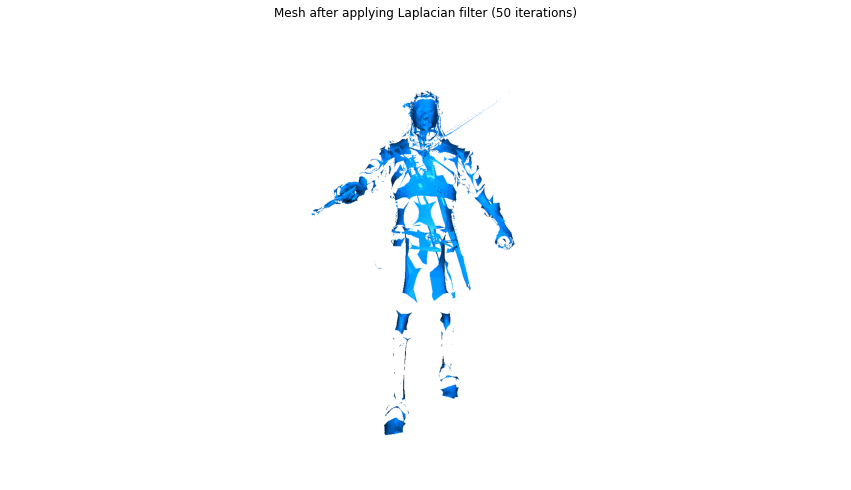

In [86]:
mesh = o3d.io.read_triangle_mesh(path_to_model) 
options = {'noise': 0.05, 'iters': 50, 'filter_type': 'laplacian'}
mesh_filtering_visualize(mesh, **options)

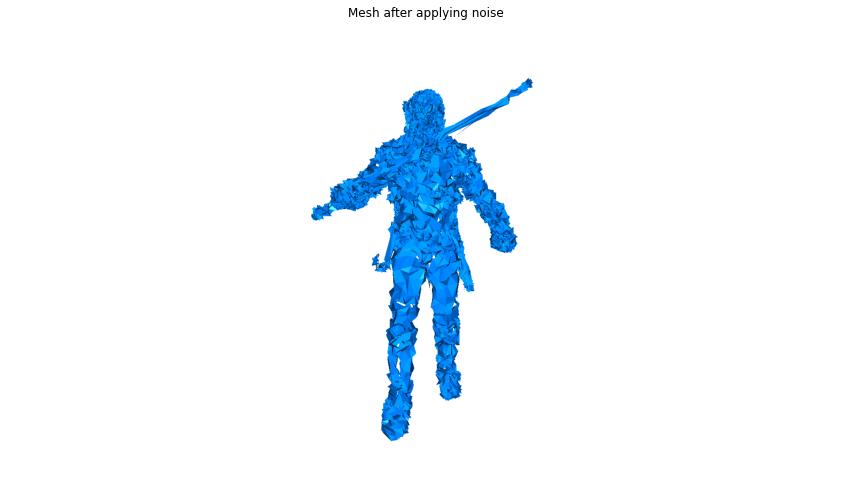

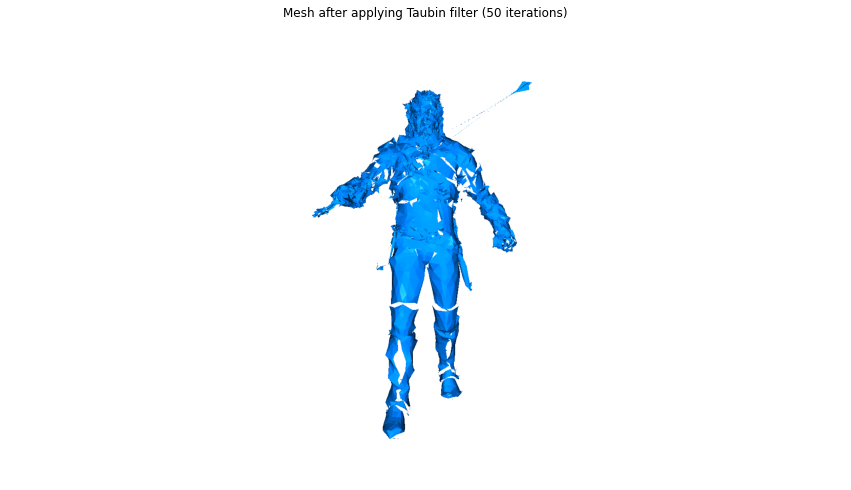

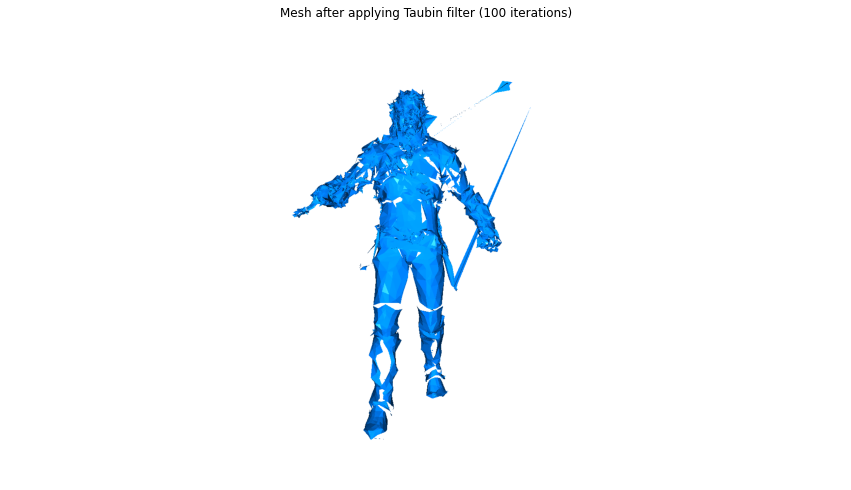

In [88]:
mesh = o3d.io.read_triangle_mesh(path_to_model) 
options = {'noise': 0.05, 'iters': 100, 'filter_type': 'taubin'}
mesh_filtering_visualize(mesh, **options)